In [1]:
import pandas as pd


In [2]:
url = "https://api.covidtracking.com/v1/states/daily.csv"


In [3]:
covid_df = pd.read_csv(url)

In [4]:
covid_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201115,AK,23814.0,NaN,843568.0,NaN,totalTestsViral,867382.0,141.0,NaN,...,867382,0,0,e932ee5bb80cf68522ff67db8d19bd8e6e3f3c1c,0,0,0,0,0,NaN
1,20201115,AL,217822.0,34331.0,1275915.0,NaN,totalTestsViral,1459406.0,1195.0,22275.0,...,1493737,2,0,bd0aca6268151786d8349818e098840bf0ce6a42,0,0,0,0,0,NaN
2,20201115,AR,133040.0,14197.0,1386711.0,NaN,totalTestsViral,1505554.0,830.0,7847.0,...,1519751,35,0,f754ef9bb7c2904f9b089474eff644a19743abab,0,0,0,0,0,NaN
3,20201115,AS,0.0,NaN,1768.0,NaN,totalTestsViral,1768.0,NaN,NaN,...,1768,0,0,813bc3f3f482bbfdfd3a086443cfb046dba631ec,0,0,0,0,0,NaN
4,20201115,AZ,275436.0,7333.0,1706395.0,NaN,totalTestsPeopleViral,1974498.0,1506.0,23049.0,...,1981831,2,112,571befb8fbe9d4c51e05b3695a2062038d4f6d47,0,0,0,0,0,NaN


In [5]:
covid_df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [6]:
covid_df.sort_values('date').tail()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
32,20201115,NE,96834.0,NaN,564409.0,NaN,totalTestsViral,1130232.0,889.0,3551.0,...,661243,4,29,899fd419b44c7afc1c4744acd28dd8b5091cec4c,0,0,0,0,0,NaN
31,20201115,ND,63796.0,NaN,259864.0,NaN,totalTestEncountersViral,962925.0,400.0,2178.0,...,323660,0,25,407321e97a262df7c19f28b7b8a5044f8d3accda,0,0,0,0,0,NaN
30,20201115,NC,312235.0,15051.0,4320374.0,NaN,posNeg,4632609.0,1395.0,NaN,...,4632609,50,0,c14991500bce4d7b376bf4033a3de244886ac705,0,0,0,0,0,NaN
28,20201115,MS,134309.0,22043.0,873863.0,NaN,posNeg,1008172.0,756.0,6914.0,...,1008172,3,0,31f19cfabef450c2a3bfa53f94a6077729773ec5,0,0,0,0,0,NaN
0,20201115,AK,23814.0,NaN,843568.0,NaN,totalTestsViral,867382.0,141.0,NaN,...,867382,0,0,e932ee5bb80cf68522ff67db8d19bd8e6e3f3c1c,0,0,0,0,0,NaN


In [7]:
df = covid_df[['date', 'state', 'deathIncrease', 'positiveIncrease', 'negativeIncrease', 'hospitalizedIncrease', 'recovered', 'onVentilatorCumulative', 'inIcuCumulative' ]].copy()

In [8]:
df['date'] = df['date'].astype('str').str[:4] + '-' + df['date'].astype('str').str[4:6] + '-' + df['date'].astype('str').str[6:]
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.isnull().sum()

date                          0
state                         0
deathIncrease                 0
positiveIncrease              0
negativeIncrease              0
hospitalizedIncrease          0
recovered                  4145
onVentilatorCumulative    13602
inIcuCumulative           11999
dtype: int64

In [10]:
df = df.sort_values(['state', 'date'], ascending=True).reset_index()
df.drop(columns=['index'], inplace=True)
df.head()

,date,state,deathIncrease,positiveIncrease,negativeIncrease,hospitalizedIncrease,recovered,onVentilatorCumulative,inIcuCumulative
0,2020-03-06,AK,0,0,0,0,NaN,NaN,NaN
1,2020-03-07,AK,0,0,4,0,NaN,NaN,NaN
2,2020-03-08,AK,0,0,2,0,NaN,NaN,NaN
3,2020-03-09,AK,0,0,9,0,NaN,NaN,NaN
4,2020-03-10,AK,0,0,0,0,NaN,NaN,NaN


In [11]:
df = df.join(
    pd.DataFrame({'recoveredIncrease': df['recovered'].diff(), 
                  'onVentilatorIncrease': df['onVentilatorCumulative'].diff(),
                  'inIcuIncrease': df['inIcuCumulative'].diff()},
                  index = df.index)
)

In [12]:
df.dtypes

date                      datetime64[ns]
state                             object
deathIncrease                      int64
positiveIncrease                   int64
negativeIncrease                   int64
hospitalizedIncrease               int64
recovered                        float64
onVentilatorCumulative           float64
inIcuCumulative                  float64
recoveredIncrease                float64
onVentilatorIncrease             float64
inIcuIncrease                    float64
dtype: object

In [13]:
df.to_csv("data/covid.csv", index=False)

In [14]:
df_daily = df[['date','positiveIncrease']].groupby('date').sum().copy()

<AxesSubplot:xlabel='date'>

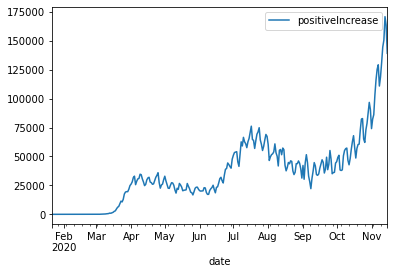

In [15]:
df_daily.plot()